In [1]:

import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
pd.set_printoptions(max_rows=15) # this limit maximum numbers of rows

AttributeError: 'module' object has no attribute 'set_printoptions'

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
pd.__version__

'0.16.2'

In [4]:
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii


/bin/sh: wget: command not found


In [9]:
ao = np.loadtxt('monthly.ao.index.b50.current.ascii.txt')

In [10]:
ao[0:2]

array([[  1.95000000e+03,   1.00000000e+00,  -6.03100000e-02],
       [  1.95000000e+03,   2.00000000e+00,   6.26810000e-01]])

In [15]:
dates = pd.date_range('1950-01', '2016-05', freq='M')


In [41]:
dates

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31', 
               ...
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30'],
              dtype='datetime64[ns]', length=796, freq='M', tz=None)

In [17]:
AO = Series(ao[:,2], index=dates)


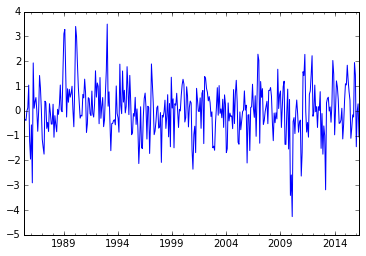

In [32]:
AO['1985-05':'2016-05'].plot()

In [34]:
nao = np.loadtxt('norm.nao.monthly.b5001.current.ascii.txt')
dates_nao = pd.date_range('1950-01', '2016-05', freq='M')
NAO = Series(nao[:,2], index=dates_nao)

In [35]:
aonao = DataFrame({'AO' : AO, 'NAO' : NAO})


In [39]:
aonao.head()

,AO,NAO,Diff
1950-01-31,-0.060310,0.92,-0.980310
1950-02-28,0.626810,0.40,0.226810
1950-03-31,-0.008127,-0.36,0.351872
1950-04-30,0.555100,0.73,-0.174900
1950-05-31,0.071577,-0.59,0.661577


In [38]:
aonao['Diff']=aonao['AO']-aonao['NAO']

In [40]:
aonao.describe()

,AO,NAO,Diff
count,796.000000,796.000000,796.000000
mean,-0.118979,-0.014792,-0.104187
std,1.007547,1.012186,0.889606
min,-4.265700,-3.180000,-2.727100
25%,-0.668655,-0.752500,-0.756705
50%,-0.046862,0.040000,-0.063160
75%,0.475240,0.690000,0.529075
max,3.495300,3.040000,2.669300


In [42]:
q_mean=aonao.resample('Q-NOV')

In [43]:
q_mean.head()

,AO,NAO,Diff
1950-02-28,0.283250,0.660000,-0.376750
1950-05-31,0.206183,-0.073333,0.279517
1950-08-31,-0.371640,-0.456667,0.085027
1950-11-30,-0.178680,-0.053333,-0.125347
1951-02-28,-0.804333,-0.080000,-0.724333


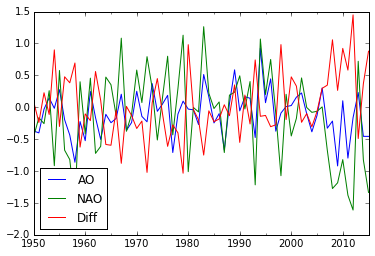

In [46]:
q_mean[q_mean.index.quarter==3].plot()

In [58]:
m3_mean = aonao[1:].resample('3M', closed='left'  )
m3_mean.head()

,AO,NAO,Diff
1950-05-31,0.391261,0.256667,0.134594
1950-08-31,-0.064111,-0.636667,0.572556
1950-11-30,-0.290647,0.350000,-0.640647
1951-02-28,-0.842726,-0.733333,-0.109393
1951-05-31,-1.036837,-0.180000,-0.856837


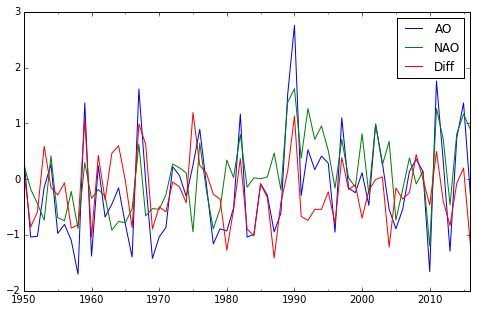

In [60]:
m3_mean[m3_mean.index.month==5].plot(figsize=(8,5))

In [61]:
aonao['mon']=aonao.index.month
aonao.head()

,AO,NAO,Diff,mon
1950-01-31,-0.060310,0.92,-0.980310,1
1950-02-28,0.626810,0.40,0.226810,2
1950-03-31,-0.008127,-0.36,0.351872,3
1950-04-30,0.555100,0.73,-0.174900,4
1950-05-31,0.071577,-0.59,0.661577,5


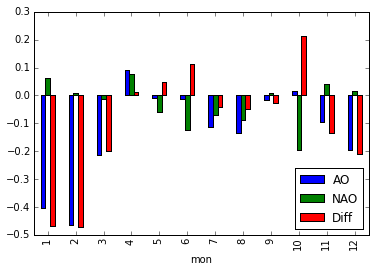

In [62]:
monmean = aonao['1950':'2013'].groupby('mon').aggregate(mean)
monmean.plot(kind='bar')

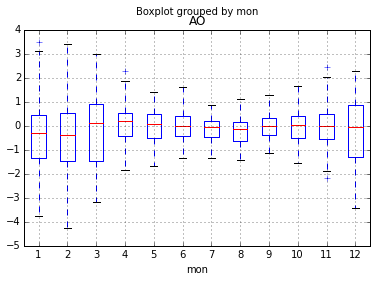

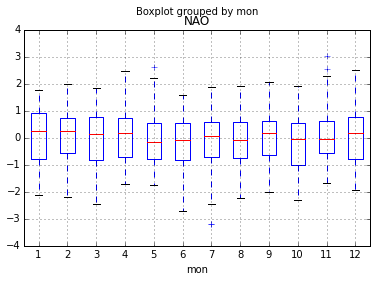

In [63]:
ax = aonao.boxplot(column=['AO'], by='mon')
ax = aonao.boxplot(column=['NAO'], by='mon')